In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
path_normal = './Data/ignition_rows.csv'
ignition_df = pd.read_csv(path_normal)  
ignition_df.columns

Index(['date', 'lon', 'lat', 'u10', 'v10', 'd2m', 't2m', 'e', 'cvh', 'cvl',
       'skt', 'stl1', 'stl2', 'stl3', 'stl4', 'slt', 'sp', 'tp', 'swvl1',
       'swvl2', 'swvl3', 'swvl4', 'month', 'day', 'hour', 'ignition'],
      dtype='object')

In [3]:
BBox = ((ignition_df.lon.min(), ignition_df.lon.max(),
         ignition_df.lat.min(), ignition_df.lat.max()))

In [4]:
ignition_df['date'] = pd.to_datetime(ignition_df['date'])
ignition_df

,date,lon,lat,u10,v10,d2m,t2m,e,cvh,cvl,...,sp,tp,swvl1,swvl2,swvl3,swvl4,month,day,hour,ignition
0,1970-01-01 00:00:00.418035600,-119.25,50.75,-0.638755,0.914924,270.945857,274.251106,-9.660722e-08,0.982031,0.014115,...,92385.908965,-8.673617e-19,0.409504,0.407843,0.379622,0.378540,4,1,9,1
1,1970-01-01 00:00:00.418057200,-122.00,51.00,-0.379458,1.673653,269.157756,272.592277,-2.788550e-06,0.892063,0.087577,...,86265.632588,-8.673617e-19,0.341352,0.332430,0.332058,0.352431,4,1,15,1
2,1970-01-01 00:00:00.418064400,-121.50,51.00,-1.811292,2.898143,269.098677,272.279144,-1.780292e-05,0.982198,0.017803,...,86661.025206,3.879493e-06,0.371114,0.354215,0.343134,0.369659,4,1,17,1
3,1970-01-01 00:00:00.418064400,-119.75,50.00,-1.043743,0.782971,271.582590,275.707218,-2.995840e-05,0.719243,0.208206,...,89733.235255,-8.673617e-19,0.393442,0.393846,0.379574,0.360351,4,1,17,1
4,1970-01-01 00:00:00.418075200,-120.25,52.00,-2.150360,3.941395,267.074263,274.157943,-9.043321e-05,0.979831,0.017420,...,86346.216174,6.178451e-06,0.331040,0.325413,0.303781,0.368025,4,1,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51913,1970-01-01 00:00:01.602162000,-119.00,50.50,-0.579377,1.220124,280.374553,280.805579,-3.934702e-06,0.925685,0.051925,...,90144.076276,9.463253e-07,0.256368,0.256701,0.250626,0.312791,10,8,13,1
51914,1970-01-01 00:00:01.602252000,-116.00,49.75,0.789841,1.023486,277.491186,277.744978,5.663771e-06,0.962267,0.037733,...,84321.628987,9.581543e-06,0.188715,0.155508,0.176283,0.266069,10,9,14,1
51915,1970-01-01 00:00:01.602421200,-121.50,51.75,1.396343,0.999898,274.208045,274.207534,-5.632813e-06,0.999878,0.000031,...,88671.964973,9.463253e-07,0.402503,0.392438,0.323796,0.375503,10,11,13,1
51916,1970-01-01 00:00:01.602673200,-116.00,49.75,2.080044,0.776145,269.055130,270.381528,8.200584e-06,0.962267,0.037733,...,84226.696015,1.336684e-05,0.265458,0.187965,0.177314,0.265303,10,14,11,1


In [5]:
print('These are the Boundaries of our Plot', BBox)
# now extract from openstreetmap the png of the background and create an image 
map_1 = plt.imread('./Data/BC_map_ignition.png')  # Background map to generate a pretty picture

These are the Boundaries of our Plot (-122.0, -116.0, 49.0, 52.0)


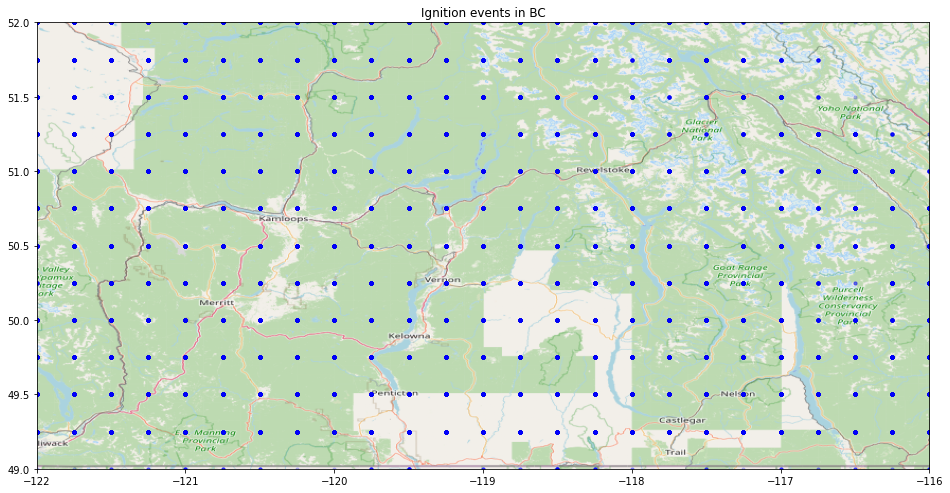

In [6]:
# map figure
fig, ax = plt.subplots(figsize=(16,14))
ax.scatter(ignition_df.lon, ignition_df.lat, zorder=1, alpha=0.2, c='b', s=10)
ax.set_title('Ignition events in BC')
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.imshow(map_1, zorder=0, extent =BBox, aspect='equal')

In [16]:
df_temp = ignition_df.groupby(['lon', 'lat']).size().rename('num_ignitions').reset_index()

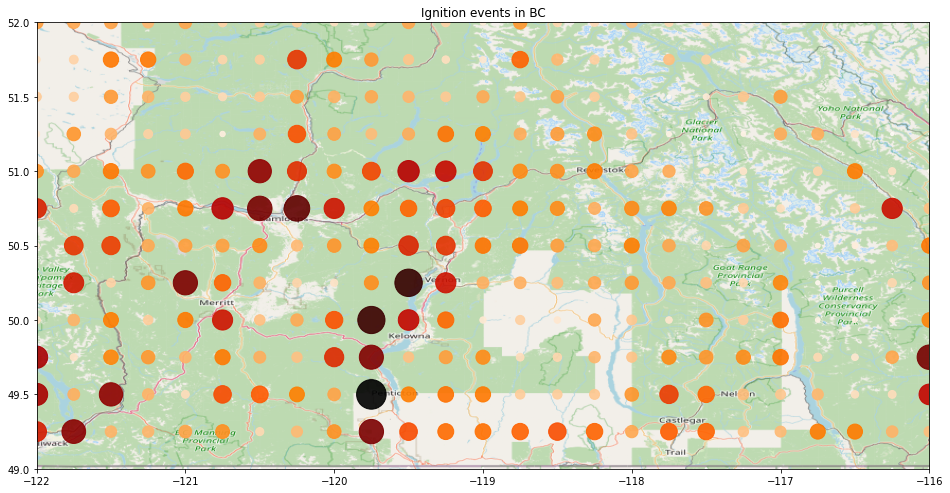

In [34]:
# map figure
fig, ax = plt.subplots(figsize=(16,14))
cm = plt.cm.get_cmap("gist_heat").reversed()
# 'red'
ax.scatter(df_temp.lon, df_temp.lat, zorder=1, alpha=0.9, cmap=cm , c=df_temp['num_ignitions'].to_numpy(), 
           s=df_temp['num_ignitions'].to_numpy())
ax.set_title('Ignition events in BC')
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.imshow(map_1, zorder=0, extent =BBox, aspect='equal')

In [35]:
import session_info
session_info.show(html=False)

-----
matplotlib          3.5.0
numpy               1.22.4
pandas              1.5.3
session_info        1.0.0
-----
IPython             7.29.0
jupyter_client      8.2.0
jupyter_core        5.3.0
notebook            6.5.4
-----
Python 3.8.12 (default, Oct 12 2021, 13:49:34) [GCC 7.5.0]
Linux-5.19.0-45-generic-x86_64-with-glibc2.17
-----
Session information updated at 2023-06-20 20:03
